# What is K-Nearest Neighbors?

## Introduction

### K-Nearest Neighbors (KNN) is a simple and widely used supervised machine learning algorithm for both classification and regression tasks. It functions on the idea that data points with similar characteristics tend to be near each other in the feature space. Basically, KNN predicts the label or value of a new data point by examining the labels or values of its "k" closest neighbors from the training dataset. This approach makes KNN intuitive and straightforward to use, making it a popular choice for various applications.





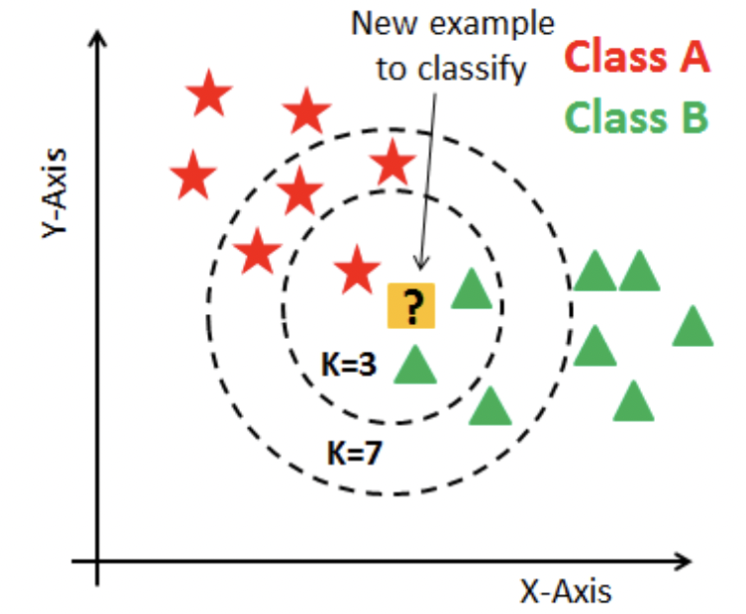

## How does K-Nearest Neighbors work?

### KNN can be broken down into the following steps:

1.   Selecting the Value of "K": choose the number of neighbors (K) to consider when making a prediction. The optimal "K" balances bias and variance in the model
2.   Calculating Distances: for a new data point, compute the distance between it and all points in the training dataset. Common distance metrics included Euclidean, Manhattan, and Minkowski distances
3.   Identifying Nearest Neighbors: sort the distance and select the "K" data points with the smallest distances to the new point
4.   Making Predictions:
  *   Classification: Assign the class that is most frequent among the "K" neighbors
  *   Regression: Caculate the average (or weighted average) of the values of the "K" neighbors to predict the value for the new point





## Choosing the optimal "K" value

### Selecting an appropriate "K" is crucial when using KNN:

*   Small "K": the model becomes sensitive to noise, leading to high variance and potential overfitting
*   Large "K": the model may oversimplify, leading to more bias and potential underfitting

### A common trend is to use cross-validation to test different "K" values and choose the one that provides the best performance.



## Distance metrics in KNN

### The chosie of distance metrics affects how similarity between data points is measured:
*   Euclidean Distance: measures the straight-line distance between two points in space, it's the most commonly used metric
*   Manhattan Distance: measures the distance between two points along axes at right angles, it's useful when movement is restricted to grid-like paths
*   Minkowski Distance: encompasses both Euclidean and Manhattan distances, allowing flexibility based on the chosen parameter

### Selecting the appropriate distnace metric depends on the nature of the data and the problem.


## Advantages and Limitations of KNN

### Advantages
*   Simplicity: easy to understand and implement
*   Versatility: can be used for both classification and regression tasks
*   No Training Phase: doesn't require a training phase, making it computationally efficient

### Disadvantages
*   Computational Cost: as the dataset grows, calculating distances for each prediction becomes computationally expensive
*   Curse of Dimensionality: performance can worsen with high-dimensional data, as distances become less meaningful
*   Imbalanced Data: if certain classes are more prevalent, the algorithm may be biased toward those classes


# K-Nearest Neighbors in Action

In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

filename = "/Users/maciek/Downloads/diabetes_dataset_with_notes.csv"

df = pd.read_csv(filename)
df = df.drop(columns = ['year', 'clinical_notes'])

df = pd.get_dummies(df, drop_first = True)

X = df.drop(columns = ['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

smote = SMOTE(random_state = 14)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_balanced_scaled, y_train_balanced)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Saving diabetes_dataset_with_notes.csv to diabetes_dataset_with_notes.csv
Accuracy: 0.92185
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     18297
           1       0.64      0.19      0.29      1703

    accuracy                           0.92     20000
   macro avg       0.78      0.59      0.63     20000
weighted avg       0.90      0.92      0.90     20000



# Visualizing Results

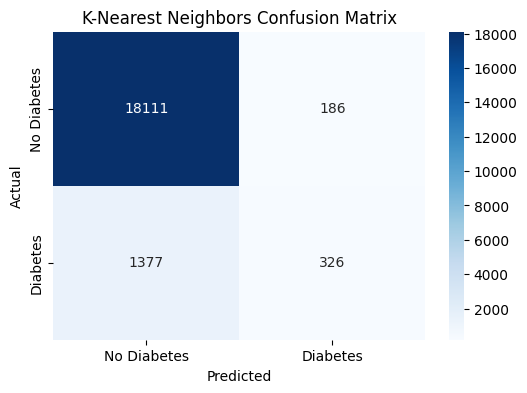

In [2]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = ['No Diabetes', 'Diabetes'],
            yticklabels = ['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

### This shows how well the model predicted who has diabetes and who doesn't.

*   True Positives - 326 people with diabetes were correctly predicted to have it.
*   True Negatives - 18111 people without diabetes were correctly predicted to not have it.
*   False Positives - 186 people without diabetes were wrongly predicted to have it.
*   False Negatives - 1377 people with diabetes were wrongly predicted to not have it.

### The model is really good at identifying people without diabetes (98.98% accuracy), but it's much less accurate at finding those with diabetes (only 19.14% accuracy).



# K-Nearest Neighbors from Scratch

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

class SimpleKNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        self.y_train = y.to_numpy().ravel() if isinstance(y, pd.Series) else y.ravel()

    def predict(self, X_test, limit=10):
        X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
        total_samples = min(len(X_test), limit)
        print(f"Running predictions for {total_samples} samples (limited for speed)")

        predictions = []

        for i in range(total_samples):
            print(f"Predicting sample {i + 1}/{total_samples}")
            sample = X_test[i]
            prediction = self._predict_single(sample)
            predictions.append(prediction)

        return np.array(predictions)

    def _predict_single(self, x):
        distances = [self._euclidean_distance(x, train_x) for train_x in self.X_train]
        nearest_indices = np.argsort(distances)[:self.k]
        nearest_labels = self.y_train[nearest_indices]
        most_common = Counter(nearest_labels).most_common(1)[0][0]
        return most_common

    def _euclidean_distance(self, a, b):
        return np.sqrt(np.sum((a - b) ** 2))

def main():
    df = pd.read_csv("/Users/maciek/Downloads/diabetes_dataset_with_notes.csv")
    df = df.drop(columns=['year', 'clinical_notes'])
    df = pd.get_dummies(df, drop_first=True)

    X = df.drop(columns=['diabetes'])
    y = df['diabetes']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=0)

    knn_scratch = SimpleKNN(k=3)
    knn_scratch.fit(X_train, y_train)

    knn_sklearn = KNeighborsClassifier(n_neighbors=3)
    knn_sklearn.fit(X_train, y_train)

    y_pred_scratch = knn_scratch.predict(X_test)
    y_pred_sklearn = knn_sklearn.predict(X_test)

    accuracy_scratch = np.mean(y_pred_scratch == y_test[:len(y_pred_scratch)]) * 100
    accuracy_sklearn = np.mean(y_pred_sklearn == y_test) * 100

    print(f"Accuracy (Scratch KNN):   {accuracy_scratch:.2f}%")
    print(f"Accuracy (sklearn KNN):   {accuracy_sklearn:.2f}%")

if __name__ == "__main__":
    main()

: 